In [2]:
# !jt -t monokai -T -N -kl 

# Установка необходимых библиотек

In [3]:
# !pip install scikit-learn
# !pip install gensim
# !pip install nltk

# Импорт библиотек

In [4]:


import os
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize



# from sklearn.svm import LinearSVC
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.linear_model import LogisticRegression

# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import Tfidata_randomVectorizer
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


import gensim
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
from gensim.test.utils import datapath


import joblib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
!pip install neattext

In [6]:
import pandas as pd
import numpy as np 
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
nltk.download('vader_lexicon')
import neattext.functions as nfx
import warnings
warnings.filterwarnings('ignore')

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Загрузка данных

In [7]:

data_random=pd.read_csv('C:/projects/VKR_Mamedova/datasets/training.csv',encoding='ISO-8859-1',header=None)
data_depressive= pd.read_csv('C:/projects/VKR_Mamedova/datasets/Suicide_Detection.csv')

# word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

# def load_google_vec(self):
#     #url = 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'
#     #wget.download(url, 'Data/GoogleNews-vectors.bin.gz')
#     return KeyedVectors.load_word2vec_format(
#         'Data/GoogleNews-vectors.bin.gz',
#         binary=True)


# # Download link
# # https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g
# word2vec_path = 'GoogleNews-vectors-negative300.bin.gz' 

In [8]:
data_random

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [9]:
data_depressive

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [10]:
# Удалим первый столбец
data_depressive = data_depressive.drop('Unnamed: 0',axis=1)

In [11]:
data_depressive

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


In [12]:
X = data_depressive.drop('class', axis=1)
y = data_depressive['class']

In [13]:
columns=data_random.columns

In [14]:
data_random.drop([1,2,3],axis=1,inplace=True)

In [15]:
data_random.columns=['Label','Username','Text']

# Очистка данных

In [16]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\d+)|(\w+:\/\/\S+)", " ", tweet).split())

In [17]:
data_random['Text'] = data_random['Text'].apply(clean_tweet)
data_random

,Label,Username,Text
0,0,_TheSpecialOne_,Awww that s a bummer You shoulda got David Car...
1,0,scotthamilton,is upset that he can t update his Facebook by ...
2,0,mattycus,I dived many times for the ball Managed to sav...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,no it s not behaving at all i m mad why am i h...
...,...,...,...
1599995,4,AmandaMarie1028,Just woke up Having no school is the best feel...
1599996,4,TheWDBoards,TheWDB com Very cool to hear old Walt interviews
1599997,4,bpbabe,Are you ready for your MoJo Makeover Ask me fo...
1599998,4,tinydiamondz,Happy th Birthday to my boo of alll time Tupac...


# Преобработка текста

# Предварительная обработка данных

In [18]:
# подготовка к процессу удаления стоп слов и лематизации
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anana\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:


# To remove emails
email_regex = r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'
regexes_to_remove = [email_regex, r'Subject:', r'Re:']

for i in range(0, len(X)):
    # removing all special charachter
    review = re.sub('[^a-zA-Z]', ' ', str(X['text'][i]))
    # make document as lowerCase
    review = review.lower()
    # splitting the documents into words for ex ['iam', 'omar']
    review = review.split()
    # make limmatization --> (change, changing, changes)---> (change)
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords)]
    # join the document agian
    review = ' '.join(review)
    
    # removing mails
    for r in regexes_to_remove:
        X['text'][i] = re.sub(r, '', review)

# Разделение данных

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Извлечение признаков

## TF-IDF

In [21]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer_n12 = TfidfVectorizer(max_features=10000, ngram_range=(1,2))


X_tfidf_train = tfidf_vectorizer.fit_transform(X_train['text'])
X_tfidf_test = tfidf_vectorizer.transform(X_test['text'])

X_tfidf_train_n12= tfidf_vectorizer_n12.fit_transform(X_train['text'])
X_tfidf_test_n12=tfidf_vectorizer_n12.transform(X_test['text'])

## Bag-of-words

In [22]:
vectorizer = CountVectorizer()
  
X_bow_train = vectorizer.fit_transform(X_train['text'])
X_bow_test = vectorizer.transform(X_test['text'])

## VADER

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
def get_vador_scores(data):
    sid=SIA()
    vador_df=data.copy()
    vador_df['scores'] = vador_df['text'].apply(lambda txt: sid.polarity_scores(str(txt)))
    
    vador_df['neg_score'] = vador_df['scores'].apply(lambda txt: txt['neg'])
    vador_df['neu_score'] =vador_df['scores'].apply(lambda txt: txt['neu'])
    vador_df['pos_score'] = vador_df['scores'].apply(lambda txt: txt['pos'])
    vador_df['compound'] = vador_df['scores'].apply(lambda txt: txt['compound'])
    vador_df.drop('scores', axis=1, inplace=True)
    vador_df.drop('text', axis=1, inplace=True)
    return vador_df

In [24]:
X_vador_train = get_vador_scores(X_train)
X_vador_test= get_vador_scores(X_test)

In [25]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# We Can select any model but linearSVC has l1 norm penality which deals with sparse
lsvc = LinearSVC(C=100, penalty='l1', max_iter=500, dual=False)
lsvc.fit(X_tfidf_train, y_train)

# This function select the best features that has high weigh
fs = SelectFromModel(lsvc, prefit=True)
# This function redeuce X to the selected features
X_selection = fs.transform(X_tfidf_train)
X_test_selection = fs.transform(X_tfidf_test)


lsvc.fit(X_tfidf_train_n12, y_train)
fs_n12 = SelectFromModel(lsvc, prefit=True)
X_selection_n12 = fs_n12.transform(X_tfidf_train_n12)
X_test_selection_n12 = fs_n12.transform(X_tfidf_test_n12)

lsvc.fit(X_bow_train, y_train)
fs_n12 = SelectFromModel(lsvc, prefit=True)
X_selection_bow = fs_n12.transform(X_bow_train)
X_test_selection_bow = fs_n12.transform(X_bow_test)

In [26]:
import matplotlib.pyplot as plt
def plot_results(data):
    
    barWidth = 0.15
    # set heights of bars

    bars1 = [data[0][1],data[1][1], data[2][1]]
    bars2 = [data[0][2], data[1][2], data[2][2]]
    bars3 = [data[0][3], data[1][3], data[2][3]]
    bars4 = [data[0][4], data[1][4], data[2][4]]
    

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    

    # Make the plot
    plt.bar(r1, bars1, color='r', width=barWidth, edgecolor='white', label='tfidf')
    plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='tfidf_n12')
    plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='bow')
    plt.bar(r4, bars4, color='#9a7f5e', width=barWidth, edgecolor='white', label='vador')
    

    # Add xticks on the middle of the group bars
    plt.xlabel('group', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], ['precision', 'recall', 'f1-score'])

    # Create legend & Show graphic
    plt.legend()
    plt.grid()
    plt.show()

In [27]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(X_selection, y_train)
y_predict_tfidf = lsvc.predict(X_test_selection)

lsvc.fit(X_selection_n12,y_train)
y_predict_tfidf_n12 = lsvc.predict(X_test_selection_n12)

lsvc.fit(X_selection_bow,y_train)
y_predict_bow = lsvc.predict(X_test_selection_bow)

lsvc.fit(X_vador_train,y_train)
y_predict_vador = lsvc.predict(X_vador_test)

linear_svm_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf)
linear_svm_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_n12)
linear_svm_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow)
vador_svm_results=metrics.precision_recall_fscore_support(y_test, y_predict_vador)

In [28]:
data1 = [['TF-IDF','TF-IDF 2-grams ','bag of words','vador'],
         ['precision',linear_svm_tfidf_results[0][0],linear_svm_tfidf_n12_results[0][0],linear_svm_bow_results[0][0],
          vador_svm_results[0][0]],
         ['recall',linear_svm_tfidf_results[1][0],linear_svm_tfidf_n12_results[1][0],linear_svm_bow_results[1][0],
          vador_svm_results[1][0]],
         ['F1-score',linear_svm_tfidf_results[2][0],linear_svm_tfidf_n12_results[2][0],linear_svm_bow_results[2][0],
          vador_svm_results[2][0]]]

In [29]:
print(tabulate(data1,headers='firstrow',tablefmt='fancy_grid'))


╒═══════════╤══════════╤═══════════════════╤════════════════╤══════════╕
│           │   TF-IDF │   TF-IDF 2-grams  │   bag of words │    vador │
╞═══════════╪══════════╪═══════════════════╪════════════════╪══════════╡
│ precision │ 0.920813 │          0.922384 │       0.874808 │ 0.684873 │
├───────────┼──────────┼───────────────────┼────────────────┼──────────┤
│ recall    │ 0.934042 │          0.934042 │       0.903495 │ 0.697472 │
├───────────┼──────────┼───────────────────┼────────────────┼──────────┤
│ F1-score  │ 0.92738  │          0.928176 │       0.88892  │ 0.691115 │
╘═══════════╧══════════╧═══════════════════╧════════════════╧══════════╛


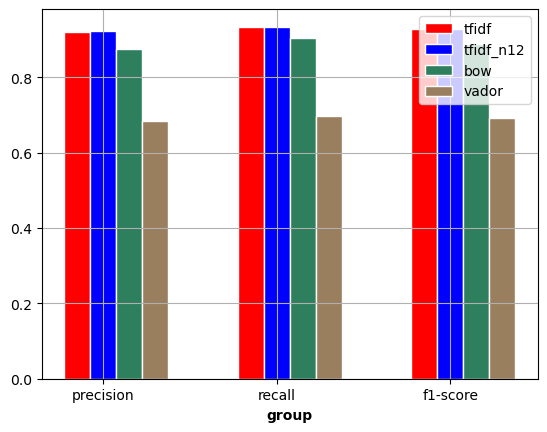

In [30]:
plot_results(data1[1:])

In [31]:
clf = RandomForestClassifier(max_depth=10)
clf.fit(X_selection, y_train)
y_predict_tfidf_2 = clf.predict(X_test_selection)

clf.fit(X_selection_n12, y_train)
y_predict_tfidf_n12_2 = clf.predict(X_test_selection_n12)

clf.fit(X_selection_bow, y_train)
y_predict_bow_2 = clf.predict(X_test_selection_bow)

clf.fit(X_vador_train, y_train)
y_predict_vador_2 = clf.predict(X_vador_test)

In [32]:
RandomForest_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_2)
RandomForest_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_n12_2)
RandomForest_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow_2)
RandomForest_vador_results=metrics.precision_recall_fscore_support(y_test, y_predict_vador_2)

In [33]:
data2 = [['TF-IDF','TF-IDF 2-grams ','bag of words','vador'],
         ['precision',RandomForest_tfidf_results[0][0],RandomForest_tfidf_n12_results[0][0],RandomForest_bow_results[0][0],
          RandomForest_vador_results[0][0]],
         ['recall',RandomForest_tfidf_results[1][0],RandomForest_tfidf_n12_results[1][0],RandomForest_bow_results[1][0],
          RandomForest_vador_results[1][0]],
         ['F1-score',RandomForest_tfidf_results[2][0],RandomForest_tfidf_n12_results[2][0],RandomForest_bow_results[2][0],
          RandomForest_vador_results[2][0]]]

In [34]:
print(tabulate(data2,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════╤══════════╤═══════════════════╤════════════════╤══════════╕
│           │   TF-IDF │   TF-IDF 2-grams  │   bag of words │    vador │
╞═══════════╪══════════╪═══════════════════╪════════════════╪══════════╡
│ precision │ 0.779189 │          0.782139 │       0.758979 │ 0.779121 │
├───────────┼──────────┼───────────────────┼────────────────┼──────────┤
│ recall    │ 0.905914 │          0.909973 │       0.911412 │ 0.773939 │
├───────────┼──────────┼───────────────────┼────────────────┼──────────┤
│ F1-score  │ 0.837786 │          0.841227 │       0.82824  │ 0.776521 │
╘═══════════╧══════════╧═══════════════════╧════════════════╧══════════╛


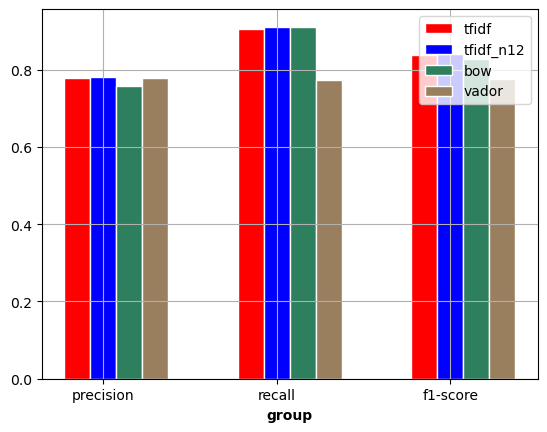

In [35]:
plot_results(data2[1:])

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression,  SGDClassifier
from sklearn.svm import SVC

In [37]:
log_clf = LogisticRegression(solver="lbfgs")
rnd_clf = RandomForestClassifier(n_estimators=100)
svm_clf = SVC(gamma="scale", probability=True)
sgd = SGDClassifier(alpha=.0001, max_iter=50, loss='log',
                                       penalty="elasticnet", n_jobs=-1)

voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='soft')

In [ ]:
voting_clf.fit(X_selection, y_train)
y_predict_tfidf_4 = voting_clf.predict(X_test_selection)

In [ ]:
voting_clf.fit(X_selection_n12, y_train)
y_predict_tfidf_n12_4 = voting_clf.predict(X_test_selection_n12)

In [ ]:
voting_clf.fit(X_selection_bow, y_train)
y_predict_bow_4 = voting_clf.predict(X_test_selection_bow)

In [ ]:
voting_clf.fit(X_vador_train, y_train)
y_predict_vador_4 = voting_clf.predict(X_vador_test)

In [ ]:
mb_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_4)
mb_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_predict_tfidf_n12_4)
mb_bow_results=metrics.precision_recall_fscore_support(y_test, y_predict_bow_4)
mb_vador_results=metrics.precision_recall_fscore_support(y_test, y_predict_vador_4)

In [ ]:
data3= [['TF-IDF','TF-IDF 2-grams ','bag of words','vador'],
        ['precision',mb_tfidf_results[0][0],mb_tfidf_n12_results[0][0],mb_bow_results[0][0],
          mb_vador_results[0][0]],
         ['recall',mb_tfidf_results[1][0],mb_tfidf_n12_results[1][0],mb_bow_results[1][0],
          mb_vador_results[1][0]],
         ['F1-score',mb_tfidf_results[2][0],mb_tfidf_n12_results[2][0],mb_bow_results[2][0],
          mb_vador_results[2][0]]]

In [ ]:
print(tabulate(data3,headers='firstrow',tablefmt='fancy_grid'))


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_selection, y_train)
y_pred_5 = bag_clf.predict(X_test_selection)

bag_clf.fit(X_selection_n12, y_train)
y_pred_n12_5 = bag_clf.predict(X_test_selection_n12)

bag_clf.fit(X_selection_bow, y_train)
y_pred_bow_5 = bag_clf.predict(X_test_selection_bow)

bag_clf.fit(X_vador_train, y_train)
y_pred_vador_5 = bag_clf.predict(X_vador_test)


In [ ]:
bag_tfidf_results=metrics.precision_recall_fscore_support(y_test, y_pred_5)
bag_tfidf_n12_results=metrics.precision_recall_fscore_support(y_test, y_pred_n12_5)
bag_bow_results=metrics.precision_recall_fscore_support(y_test, y_pred_bow_5)
bag_vador_results=metrics.precision_recall_fscore_support(y_test, y_pred_vador_5)

In [ ]:
data4= [['TF-IDF','TF-IDF 2-grams ','bag of words','vador'],
        ['precision',bag_tfidf_results[0][0],bag_tfidf_n12_results[0][0],bag_bow_results[0][0],
          bag_vador_results[0][0]],
         ['recall',bag_tfidf_results[1][0],bag_tfidf_n12_results[1][0],bag_bow_results[1][0],
          bag_vador_results[1][0]],
         ['F1-score',bag_tfidf_results[2][0],bag_tfidf_n12_results[2][0],bag_bow_results[2][0],
          bag_vador_results[2][0]]]

In [ ]:
print(tabulate(data4,headers='firstrow',tablefmt='fancy_grid'))

In [ ]:
plot_results(data4[1:])

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [ ]:
model = Sequential()

# Add LSTM layer with 32 units
# model.add(LSTM(units=32, input_shape=(10, 1)))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

# Add output layer
# model.add(Dense(units=1))
model.add(Dense(3, activation='softmax'))

# Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

In [ ]:
from keras.utils.vis_utils import plot_model

# построение архитектуры модели
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint

batch_size = 16
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 3, batch_size=batch_size)

## Токенизация
Токенизация — процесс разбиения текстового документа на отдельные слова, которые называются токенами.

In [ ]:
tokens = [word_tokenize(sen) for sen in data_random.Text]

In [ ]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [ ]:
data_random['Text_Final'] = [' '.join(sen) for sen in lower_tokens]
data_random['tokens'] = lower_tokens

In [ ]:
data_random

# Векторизация текстовых данных

Процесс конвертации текста в числа называется векторизацией. Теперь после Text Preprocessing, нам нужно представить текст в числовом виде, то есть закодировать текстовые данные в виде чисел, которые в дальнейшем могут использоваться в алгоритмах.

# Модели

In [ ]:
pos = []
neg = []
for l in data_random.Label:
    if l == 0:
        pos.append(0)
        neg.append(1)
    elif l == 1:
        pos.append(1)
        neg.append(0)


data_random['Pos']= pos
data_random['Neg']= neg

df.loc[1:5, 'column_name'] = [value1, value2, value3, value4, value5]
data_random = data_random[['Text_Final', 'tokens', 'Label']]
data_random.head()
len(data_random['Text_Final'])

In [ ]:
data_train, data_test = train_test_split(data_random,test_size=0.30,random_state=0)

In [ ]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

In [ ]:
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

In [ ]:

# Download link
# https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
word2vec_path = 'GoogleNews-vectors-negative300.bin.gz'   
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [ ]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)

In [ ]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

In [ ]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())
train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
train_embedding_weights = np.zeros((len(train_word_index)+1,EMBEDDING_DIM))
for word,index in train_word_index.items():
     train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

In [ ]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    convs = []
    filter_sizes = [2,3,4,5,6]
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, 
                        kernel_size=filter_size, 
                        activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)
    l_merge = concatenate(convs, axis=1)
    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)
    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [ ]:
label_names = ['Pos', 'Neg']

In [ ]:
y_train = data_train[label_names].values


In [ ]:
x_train = train_cnn_data
y_tr = y_train

In [ ]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1,EMBEDDING_DIM, len(list(label_names)))

In [ ]:
num_epochs = 3
batch_size = 32
hist = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.3, shuffle=True, batch_size=batch_size)

In [ ]:
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)
labels = [1, 0]
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])
sum(data_test.Label==prediction_labels)/len(prediction_labels)

In [ ]:
model.save('depx007.h5')

In [ ]:

joblib.dump(tokenizer,'model_tokenizer')